In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
from skimage.transform import SimilarityTransform, warp
from skimage.data import camera
from scipy.optimize import minimize, differential_evolution
from similarityMeasures import MutualInformation, NormalizedMutualInformation, CorrelationCoefficient

In [2]:
src = camera().astype(np.float)

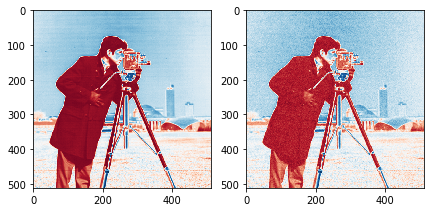

In [44]:
src = camera().astype(np.float)
trg = src + 5 * np.random.randn(src.shape[0],src.shape[1])
fig, axes = plt.subplots(1,2, figsize=(7,7))
for ax, imp in zip(axes.flatten(), [src, trg]):
    ax.imshow(imp,cmap='RdBu')

In [45]:
# Compute Joint Histogram
H, _, _= np.histogram2d(src.ravel(), trg.ravel(), bins = 512)

# Calculate Similarity Measure
MI = MutualInformation((1,1))
NMI = NormalizedMutualInformation((1,1))

MI_val = MI.__call__(H)
NMI_val = NMI.__call__(H)
print('Mutual Information (between src and trg) = %f \nNormalized Mutual Information = %f.' 
      %( MI.__call__(H), NMI.__call__(H)))

Mutual Information (between src and trg) = 2.022349 
Normalized Mutual Information = 0.384714.


Try to find $\sigma$ by optimizing NMI/MI between `trg` and `src` + $\sigma * N(0,1)$.  
Ground truth is $\sigma = 21$

In [49]:
# let's optimize
def evaluteSim(sim, P, Q):
    H, _, _ = np.histogram2d(P.ravel(), Q.ravel(), bins = 512)
    return sim.__call__(H)

    
def objectiveFunc(params):
    trs = src + params[0]*np.random.randn(src.shape[0],src.shape[1])
    sim = evaluteSim(NMI, trg, trs)
#     print('Similarity Measure = %f \n' %(sim))
#     print(trans.params)
    return -sim

# simplex minimization
initial_params = [10.]
options = dict([('xtol', 1e-10),('ftol', 1e-10), ('disp', True)])
results = minimize(objectiveFunc, initial_params, method = 'Powell', options=options)

# # conjugate-Gradient
# initial_params = [1.]
# options = dict([('disp', True)])
# results = minimize(objectiveFunc, initial_params, method = 'CG',options=options)

# # differential Evolution
# bounds = [(-50,50)]

# results = differential_evolution(objectiveFunc,bounds,
#                                  strategy='best1bin',maxiter=int(1e2),popsize=10,mutation=(0.75,1.),
#                                  disp=True,polish='False',tol=1e-3)

Optimization terminated successfully.
         Current function value: -0.384699
         Iterations: 3
         Function evaluations: 149


In [50]:
results

   direc: array([[-0.00016814]])
     fun: -0.38469930463991986
 message: 'Optimization terminated successfully.'
    nfev: 149
     nit: 3
  status: 0
 success: True
       x: array(-0.00101089)

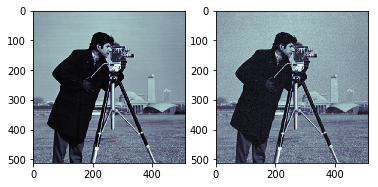

In [51]:
fig,ax = plt.subplots(1,2)
ax[0].imshow(src - results.x * np.random.randn(src.shape[0],src.shape[1]),cmap='bone')
ax[1].imshow(trg, cmap='bone')